<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 6</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Javier González Paredes</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
<center><h5>https://github.com/JavierGonzalezP/EIE_401_MULTIMEDIA</h5></center>

## 1. Operaciones para extracción de características.

### 1.1 Con un audio (voz o música) no mayor a 30 segundos, utilizando la libreria Librosa (https://librosa.org/), numpy, pytorch, implementa operaciones fundamentales como: 
- Media
- Kurtosis
- Skewness
- Zero Crossing Rate 
- Spectral Centroid
- Energía
- RMSE
- Frecuencia fundamental
<p align="justify">
Estas operaciones son fundamentales en el proceso de extracción de características. Explica el resultado obtenido y que significa cada uno.

In [8]:
import librosa
import numpy as np
import torch

def extract_audio_features(audio_path):
    # Cargar el audio
    y, sr = librosa.load(audio_path, sr=None)
    
    # Media
    mean = np.mean(y)
    
    # Kurtosis
    kurtosis = np.mean((y - mean) ** 4) / np.mean((y - mean) ** 2) ** 2
    
    # Skewness
    skewness = np.mean((y - mean) ** 3) / np.mean((y - mean) ** 2) ** (3/2)
    
    # Zero Crossing Rate
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))
    
    # Spectral Centroid
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    
    # Energía
    energy = np.mean(librosa.feature.rms(y=y))
    
    # RMSE (Root Mean Square Error)
    rmse = np.mean(librosa.feature.rms(y=y))
    
    # Frecuencia fundamental utilizando Yin
    fundamental_frequency = librosa.yin(y, fmin=50, fmax=11025)
    fundamental_frequency_mean = np.mean(fundamental_frequency)

    # Normalizar características utilizando PyTorch
    features = torch.tensor([mean, kurtosis, skewness, zcr, spectral_centroid, energy, rmse, fundamental_frequency_mean], dtype=torch.float32)
    normalized_features = (features - torch.mean(features)) / torch.std(features)
    
    return normalized_features

# Ruta al archivo de audio
audio_path = "Imperial_March.wav"

# Extracción de características
audio_features = extract_audio_features(audio_path)
print(audio_features)

tensor([-0.5091, -0.5030, -0.5092, -0.5091,  2.1586, -0.5090, -0.5090,  0.8897])


## 2. Implementaciones

### 2.1 Utilizando Pytorch Audio obtenga el espectrograma del audio original
El espectrograma debe producirse para valores número de muestras para la transformada rápida de fourier de  32, 128, 512. 


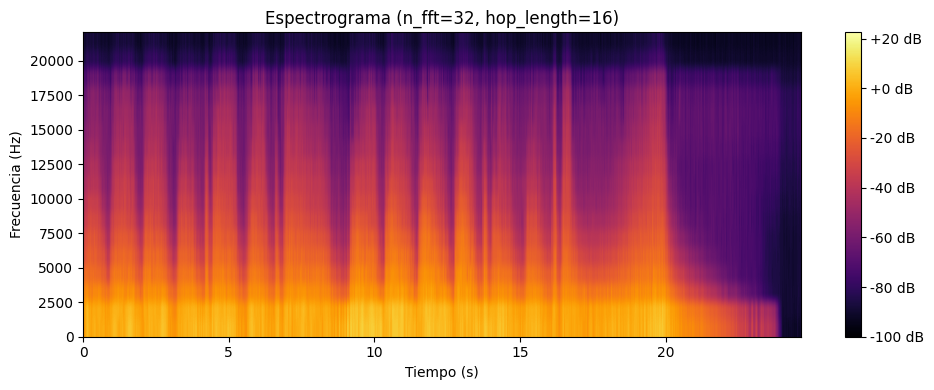

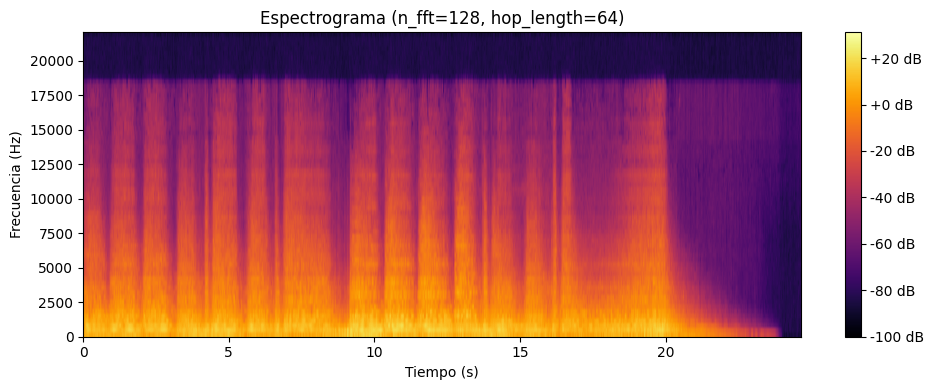

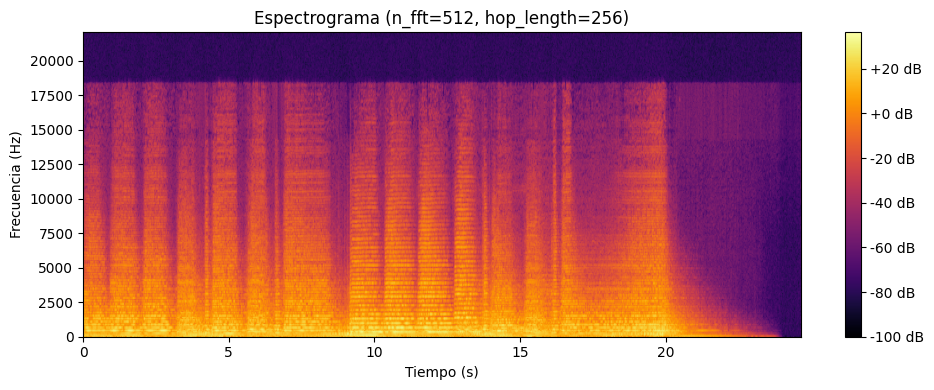

In [6]:
import torchaudio
import torch
import matplotlib.pyplot as plt

def generate_spectrogram(audio_path, n_fft, hop_length, sample_rate):
    # Cargar el audio
    waveform, _ = torchaudio.load(audio_path)
    
    # Calcular el espectrograma
    specgram = torchaudio.transforms.Spectrogram(n_fft=n_fft, hop_length=hop_length)(waveform)
    
    return specgram

# Ruta al archivo de audio
audio_path = "Imperial_March.wav"

# Tamaños de ventana para la transformada de Fourier
n_ffts = [32, 128, 512]
hop_lengths = [16, 64, 256]  # Reducción de la resolución temporal
sample_rate = 44100  # Tasa de muestreo del audio

for n_fft, hop_length in zip(n_ffts, hop_lengths):
    # Generar el espectrograma
    specgram = generate_spectrogram(audio_path, n_fft, hop_length, sample_rate)
    
    # Convertir a decibelios
    specgram_db = torchaudio.transforms.AmplitudeToDB()(specgram)
    
    # Convertir a numpy array y seleccionar un canal
    specgram_np = specgram_db.squeeze(0).numpy()
    
    # Elegir dimensiones para mostrar en el eje x y el eje y
    freq_bins = specgram_np.shape[0]
    time_frames = specgram_np.shape[2]
    
    # Graficar el espectrograma
    plt.figure(figsize=(10, 4))
    plt.imshow(specgram_np[0], cmap='inferno', aspect='auto', origin='lower', 
               extent=[0, time_frames * hop_length / sample_rate, 0, sample_rate / 2])
    plt.title(f"Espectrograma (n_fft={n_fft}, hop_length={hop_length})")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Frecuencia (Hz)")
    plt.colorbar(format="%+2.0f dB")
    plt.tight_layout()
    plt.show()


### 3. Audio Processing
### 3.1 En matlab, del paquete de procesamiento de audio, debes elegir una función de la librería, estudiarla y hacer un ejemplo.

Debes enviar un informe en PDF de 1 (una) página explicando, el algoritmo seleccionado, como funciona y el ejemplo que desarrollaste. Incluye por lo menos un gráfico que demuestre el trabajo realizado. 

Debes subir a tu repositorio el código en matlab con dicha solución.

En el sitio  https://la.mathworks.com/help/audio/index.html?s_tid=CRUX_lftnav y https://la.mathworks.com/help/audio/audio-processing-algorithm-design.html, encuentras diferentes funciones para generar efectos como reverberancia o control de la onda (compresores, gates, etc)

Así mismo, en el sitio https://la.mathworks.com/help/signal/measurements-and-feature-extraction.html, encuentras ejemplos para extracción de caracteristicas de la señal de audio, por ejemplo métricas de pulso y de transición.


    

## 5. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html

[MFCC]https://medium.com/@derutycsl/intuitive-understanding-of-mfccs-836d36a1f779

[Cepstrum]https://www.kuniga.me/blog/2021/12/11/pitch-via-cepstrum.html

[LPC] https://www.youtube.com/watch?v=DIr6SPdK4NA

[LPC] https://www.kuniga.me/blog/2021/05/13/lpc-in-python.html

[MFCC] https://librosa.org/doc/0.10.1/generated/librosa.feature.mfcc.html#librosa.feature.mfcc

[MFCC] https://pytorch.org/audio/main/generated/torchaudio.transforms.MFCC.html
